In [455]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import pmdarima as pm

In [456]:
df = pd.read_csv("daily-total-female-births.csv", parse_dates = ['Date'], index_col = ['Date'])

In [457]:
df.shape

(365, 1)

In [458]:
df.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [459]:
df.isnull().sum()

Births    0
dtype: int64

<AxesSubplot:xlabel='Date'>

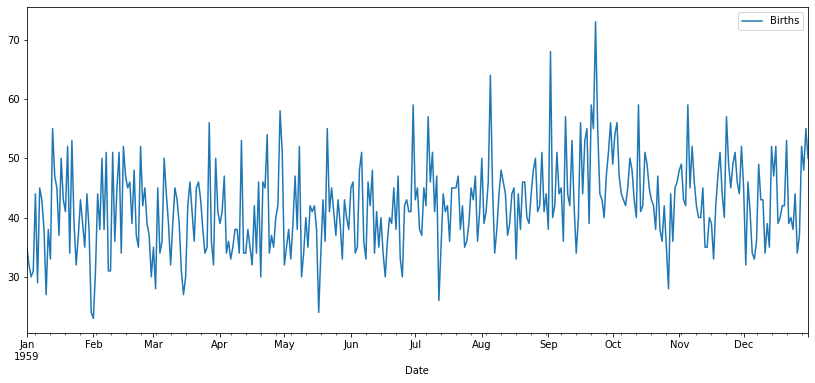

In [460]:
df.plot(figsize=(14,6))

In [461]:
rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window = 12).std()

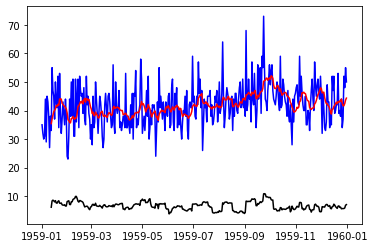

In [462]:
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.show()

In [463]:
adf = adfuller(df.loc[:, 'Births'].values, autolag = 'AIC')
print("ADF Statistic:", adf[0])
print("p-value:", adf[1])
print("n_lags:", adf[2])
for key, value in adf[4].items():
    print("Critical values:", key, value)

ADF Statistic: -4.808291253559763
p-value: 5.243412990149865e-05
n_lags: 6
Critical values: 1% -3.448748905151901
Critical values: 5% -2.8696473721448728
Critical values: 10% -2.5710891239349585


In [464]:
if(adf[1]<0.05):
    print("Stationary data")
else:
    print("Non-stationary data") 

Stationary data


In [465]:
X = df.values

predicted=46.358504, expected=42.000000
predicted=45.809913, expected=34.000000
predicted=44.533052, expected=40.000000
predicted=42.008302, expected=56.000000
predicted=45.542463, expected=44.000000
predicted=45.143492, expected=53.000000
predicted=45.151975, expected=55.000000
predicted=47.509389, expected=39.000000
predicted=47.022304, expected=59.000000
predicted=51.276931, expected=55.000000
predicted=51.104843, expected=73.000000
predicted=57.072666, expected=55.000000
predicted=56.360488, expected=44.000000
predicted=52.869577, expected=43.000000
predicted=53.496737, expected=40.000000
predicted=51.013196, expected=47.000000
predicted=50.626960, expected=51.000000
predicted=47.570657, expected=56.000000
predicted=47.983872, expected=49.000000
predicted=47.739450, expected=54.000000
predicted=49.403299, expected=56.000000
predicted=52.510640, expected=47.000000
predicted=51.828371, expected=44.000000
predicted=49.956130, expected=43.000000
predicted=47.918256, expected=42.000000


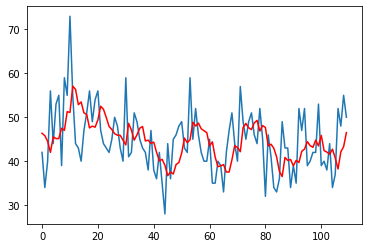

In [466]:
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = sm.tsa.arima.ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
mse = mean_squared_error(test, predictions)
print('MSE: ', mse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [467]:
X = df.values
size = int(len(X) * 0.7)
print(size)

255


In [469]:
train = df[:size]
test = df[size-1:]

In [470]:
test.shape

(111, 1)

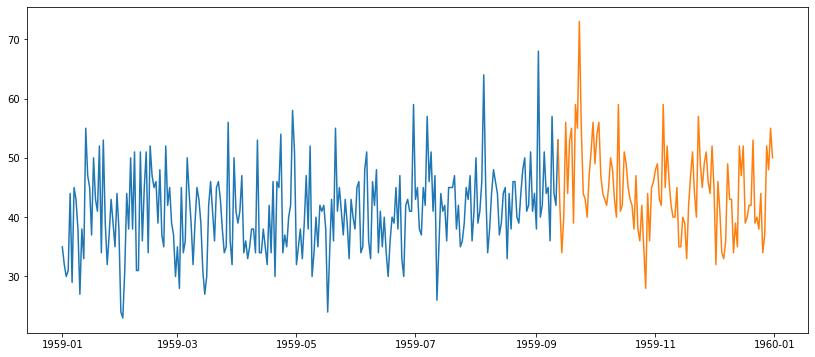

In [471]:
plt.figure(figsize = (14, 6))
plt.plot(train)
plt.plot(test)

In [472]:
arima_model = pm.arima.auto_arima(train, start_p=0, start_q = 0,
                                  max_p = 5, max_d=5, max_q=5, start_P=0,
                                  D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
                                  m=12, season = True, trace = True,
                                  error_action='ignore',
                                  suppress_warnings=True,
                                  stepwise=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1823.916, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1739.923, Time=0.32 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1822.631, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1822.369, Time=0.14 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1703.187, Time=1.14 sec
 ARIMA(1,0,0)(3,1,0)[12] intercept   : AIC=1694.976, Time=2.24 sec
 ARIMA(1,0,0)(4,1,0)[12] intercept   : AIC=1686.661, Time=4.23 sec
 ARIMA(1,0,0)(5,1,0)[12] intercept   : AIC=1683.322, Time=9.85 sec
 ARIMA(1,0,0)(5,1,1)[12] intercept   : AIC=inf, Time=28.16 sec
 ARIMA(1,0,0)(4,1,1)[12] intercept   : AIC=inf, Time=11.04 sec
 ARIMA(0,0,0)(5,1,0)[12] intercept   : AIC=1681.723, Time=9.68 sec
 ARIMA(0,0,0)(4,1,0)[12] intercept   : AIC=1685.985, Time=2.67 sec
 ARIMA(0,0,0)(5,1,1)[12] intercept   : AIC=inf, Time=31.51 sec
 ARIMA(0,0,0)(4,1,1)[12] intercept  

In [473]:
print(arima_model.summary())

                                SARIMAX Results                                 
Dep. Variable:                        y   No. Observations:                  255
Model:             SARIMAX(5, 1, 0, 12)   Log Likelihood                -833.862
Date:                  Tue, 07 Mar 2023   AIC                           1681.723
Time:                          02:53:15   BIC                           1706.175
Sample:                      01-01-1959   HQIC                          1691.572
                           - 09-12-1959                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.0029      0.543      1.845      0.065      -0.062       2.068
ar.S.L12      -0.9826      0.061    -16.020      0.000      -1.103      -0.862
ar.S.L24      -0.8171      0.096    

In [474]:
PLSWORKIMTIREDDDDDDD = pd.date_range('1959-09-12', '1960-01-31')
pred = pd.DataFrame(arima_model.predict(n_periods = 141), index = PLSWORKIMTIREDDDDDDD)
pred.columns = ['Prediction Births']
pred.head()

,Prediction Births
1959-09-12,NaN
1959-09-13,42.045393
1959-09-14,43.889553
1959-09-15,44.322451
1959-09-16,43.272019


In [475]:
test_pred = pred[:111]
next_pred = pred[111:]

In [476]:
next_pred.tail()

,Prediction Births
1960-01-27,49.614517
1960-01-28,48.034358
1960-01-29,48.086949
1960-01-30,43.571290
1960-01-31,50.781749


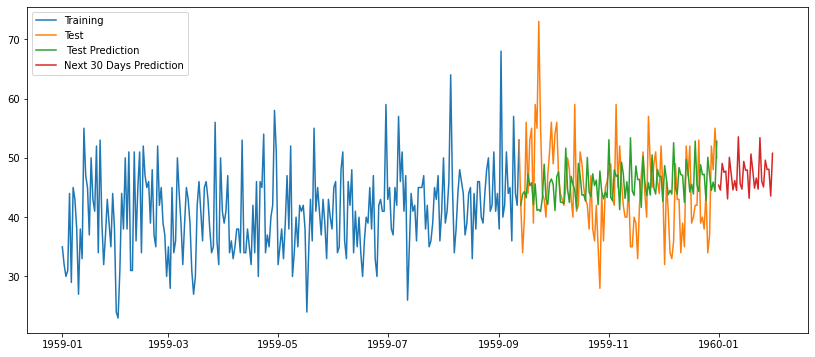

In [477]:
plt.figure(figsize = (14, 6))
plt.plot(train, label = "Training")
plt.plot(test, label = "Test")
plt.plot(test_pred, label = " Test Prediction")
plt.plot(next_pred, label = "Next 30 Days Prediction")
plt.legend(loc = "upper left")